# Olympic Dataset

In [1]:
# Standard imports
import pandas as pd

# Visulation Imports
import matplotlib.pyplot as plt
import seaborn as sns

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Modeling imports
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import sklearn.preprocessing
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# turn off pink boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading in the csv and saving it to df
df = pd.read_csv('athlete_events.csv')

In [3]:
# reading in the csv and saving it to df1
df1 = pd.read_csv('noc_regions.csv')

In [4]:
# Lets take a look at our data
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# How many rows and columns do we have?
df.shape

(271116, 15)

In [6]:
# Are there nulls and if yes, how many?
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
# Lets look at our other dataframe
df1.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
# How many rows and columns does it have?
df1.shape

(230, 3)

In [9]:
# Does it have nulls and if yes, how many?
df1.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [10]:
# Lets make a function to return a 1 if they received a medal and a 0 if they didn't
def filter(x):
    if x == 'Gold' or x == 'Silver' or x =='Bronze':
        return 1
    else:
        return 0

In [11]:
def filter_2(x):
    if x == 'M':
        return 1
    else:
        return 0

In [12]:
df['Sex_Male'] = df['Sex'].apply(filter_2)


In [13]:
# lets apply that function to our dataframe
df['medalist'] = df['Medal'].apply(filter)


In [14]:
# Lets make sure it worked properly
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_Male,medalist
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,1,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,1,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0


In [15]:
# Lets feature engineer a coulumn for BMI 
df['BMI'] = round((df['Weight'] * 0.45359237) / ((df['Height'] / 100) ** 2), 1)

In [16]:
# Lets make sure it worked
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_Male,medalist,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,1,0,11.2
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1,0,9.4
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,1,0,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,1,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,10.9


In [17]:
# Lets create bins for the age and add it as a column
bins= [0,10,20,30,40,50,60,70,80,90]
labels = ['Under_10','10s','20s','30s','40s','50s','60s','70s','80s']
df['AgeBins'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [18]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_Male,medalist,BMI,AgeBins
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,1,0,11.2,20s
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1,0,9.4,20s
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,1,0,NaN,20s
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,1,NaN,30s
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,10.9,20s


In [19]:
# Lets make 
df.isnull().sum()

ID               0
Name             0
Sex              0
Age           9474
Height       60171
Weight       62875
Team             0
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal       231333
Sex_Male         0
medalist         0
BMI          64263
AgeBins       9476
dtype: int64

## Lets split our data

In [20]:
# train/validate/test split
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

## Lets look at the nulls in the first dataframe

In [21]:
df.shape

(271116, 19)

In [22]:
df.isnull().sum()

ID               0
Name             0
Sex              0
Age           9474
Height       60171
Weight       62875
Team             0
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal       231333
Sex_Male         0
medalist         0
BMI          64263
AgeBins       9476
dtype: int64

### lets look at age first

In [23]:
df.Age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

## it appears there are likely some outliers, however it is likely safe to impute the nulls with the mean 

In [24]:
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(train[['Age']])
train[['Age']] = imputer.transform(train[['Age']])

validate[['Age']] = imputer.transform(validate[['Age']])

test[['Age']] = imputer.transform(test[['Age']])

In [25]:
train.isnull().sum()

ID               0
Name             0
Sex              0
Age              0
Height       33482
Weight       35051
Team             0
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal       129589
Sex_Male         0
medalist         0
BMI          35818
AgeBins       5239
dtype: int64

In [26]:
train.Age.describe()

count    151824.000000
mean         25.554600
std           6.283664
min          11.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          88.000000
Name: Age, dtype: float64

## Lets look at the next nulls 


In [27]:
train.isnull().sum()

ID               0
Name             0
Sex              0
Age              0
Height       33482
Weight       35051
Team             0
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal       129589
Sex_Male         0
medalist         0
BMI          35818
AgeBins       5239
dtype: int64

## I believe that height and weight nulls may be related to the year they played, so lets try that 


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151824 entries, 177199 to 175071
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ID        151824 non-null  int64   
 1   Name      151824 non-null  object  
 2   Sex       151824 non-null  object  
 3   Age       151824 non-null  float64 
 4   Height    118342 non-null  float64 
 5   Weight    116773 non-null  float64 
 6   Team      151824 non-null  object  
 7   NOC       151824 non-null  object  
 8   Games     151824 non-null  object  
 9   Year      151824 non-null  int64   
 10  Season    151824 non-null  object  
 11  City      151824 non-null  object  
 12  Sport     151824 non-null  object  
 13  Event     151824 non-null  object  
 14  Medal     22235 non-null   object  
 15  Sex_Male  151824 non-null  int64   
 16  medalist  151824 non-null  int64   
 17  BMI       116006 non-null  float64 
 18  AgeBins   146585 non-null  category
dtypes: category(1), fl

In [29]:
train.Year.value_counts()

1992    9140
1988    8245
2000    7906
2016    7702
1996    7672
2008    7612
2004    7536
2012    7218
1972    6808
1984    6419
1976    5942
1968    5825
1964    5259
1960    5248
1952    5212
1980    5038
1936    4133
1948    4107
1956    3596
1924    3145
1928    3124
2014    2741
2010    2463
2006    2426
1920    2395
2002    2320
1912    2253
1998    2038
1932    1882
1994    1747
1908    1743
1900    1011
1906     976
1904     725
1896     217
Name: Year, dtype: int64

In [30]:
train[(train['Year'] > 1960)].isnull().sum()

ID              0
Name            0
Sex             0
Age             0
Height       5696
Weight       6078
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal       96757
Sex_Male        0
medalist        0
BMI          6376
AgeBins       497
dtype: int64

## It appears some where between 1950 and 1960 they started recording the height and weight more frequently 

## Lets drop the games before the year 1960, as we don't have much data we really cant afford to have a null in the weight and height of the athlete performing 

In [31]:
train = train[(train['Year'] > 1960)]
validate = validate[(validate['Year'] > 1960)]
test = test[(test['Year'] > 1960)]

In [32]:
train.isnull().sum()

ID              0
Name            0
Sex             0
Age             0
Height       5696
Weight       6078
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal       96757
Sex_Male        0
medalist        0
BMI          6376
AgeBins       497
dtype: int64

In [33]:
train.shape

(112057, 19)

## Lets drop the remainin nulls in Height, Weight, and BMI

In [34]:
train.Medal = train.Medal.fillna('None')
validate.Medal = validate.Medal.fillna('None')
test.Medal = test.Medal.fillna('None')


In [35]:
train = train.dropna()
validate = validate.dropna()
test = test.dropna()

In [36]:
train.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height      0
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
Sex_Male    0
medalist    0
BMI         0
AgeBins     0
dtype: int64

In [37]:
# train['medalist'] = train['Medal'].apply(filter)
# validate['medalist'] = validate['Medal'].apply(filter)
# test['medalist'] = test['Medal'].apply(filter)


In [38]:
train.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height      0
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
Sex_Male    0
medalist    0
BMI         0
AgeBins     0
dtype: int64

In [39]:
train.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_Male,medalist,BMI,AgeBins
177199,89088,Michael Omondi,M,26.0,168.0,70.0,Kenya,KEN,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Men's Hockey,None,1,0,11.2,20s
200426,100640,Hana n,F,19.0,157.0,40.0,Czechoslovakia,TCH,1988 Summer,1988,Summer,Seoul,Gymnastics,Gymnastics Women's Balance Beam,None,0,0,7.4,10s
264622,132418,Yan Wing-Shean,M,22.0,173.0,72.0,Chinese Taipei,TPE,1988 Summer,1988,Summer,Seoul,Fencing,"Fencing Men's Foil, Individual",None,1,0,10.9,20s
42842,22107,Beatrice Nicoleta Coad-Claru,F,16.0,170.0,64.0,Romania,ROU,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Women's 200 metres Breaststroke,None,0,0,10.0,10s
42612,21983,Arnaud Clment,M,30.0,172.0,72.0,France-2,FRA,2008 Summer,2008,Summer,Beijing,Tennis,Tennis Men's Doubles,None,1,0,11.0,30s


In [40]:
train.shape

(105414, 19)

Sex
M    69530
F    35884
Name: Sex, dtype: int64
M    65.958981
F    34.041019
Name: Sex, dtype: float64


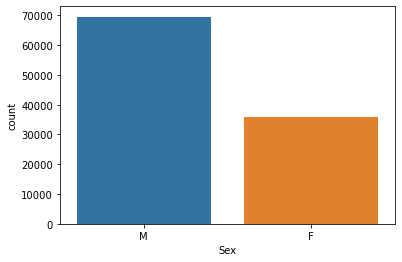

Team
United States         6291
Canada                4092
France                3831
Italy                 3803
Japan                 3760
                      ... 
Serendipity              1
Xolotl                   1
Puerto Rico-2            1
Guanahani                1
Pousse-Moi Pas VII       1
Name: Team, Length: 414, dtype: int64
United States         5.967898
Canada                3.881837
France                3.634242
Italy                 3.607680
Japan                 3.566889
                        ...   
Serendipity           0.000949
Xolotl                0.000949
Puerto Rico-2         0.000949
Guanahani             0.000949
Pousse-Moi Pas VII    0.000949
Name: Team, Length: 414, dtype: float64


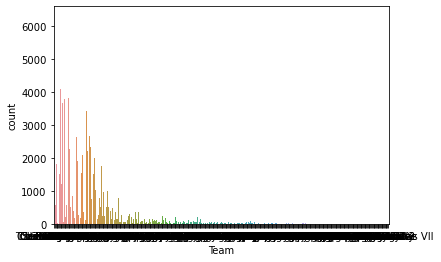

NOC
USA    6567
CAN    4258
ITA    3947
FRA    3910
JPN    3836
       ... 
KOS       4
KIR       3
TUV       2
SSD       2
YMD       2
Name: NOC, Length: 219, dtype: int64
USA    6.229723
CAN    4.039312
ITA    3.744284
FRA    3.709185
JPN    3.638985
         ...   
KOS    0.003795
KIR    0.002846
TUV    0.001897
SSD    0.001897
YMD    0.001897
Name: NOC, Length: 219, dtype: float64


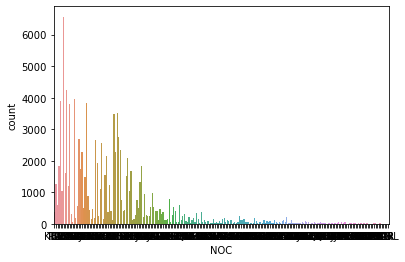

Games
2000 Summer    7809
2016 Summer    7573
2004 Summer    7509
2008 Summer    7499
2012 Summer    6997
1996 Summer    6599
1988 Summer    6504
1992 Summer    5733
1972 Summer    5570
1984 Summer    4935
1968 Summer    4674
1976 Summer    4666
1964 Summer    4111
1980 Summer    3870
2014 Winter    2612
2010 Winter    2448
2006 Winter    2417
2002 Winter    2295
1998 Winter    1986
1994 Winter    1651
1992 Winter    1563
1988 Winter    1144
1984 Winter    1071
1968 Winter    1001
1972 Winter     964
1980 Winter     750
1976 Winter     744
1964 Winter     719
Name: Games, dtype: int64
2000 Summer    7.407934
2016 Summer    7.184055
2004 Summer    7.123342
2008 Summer    7.113856
2012 Summer    6.637638
1996 Summer    6.260079
1988 Summer    6.169958
1992 Summer    5.438557
1972 Summer    5.283928
1984 Summer    4.681541
1968 Summer    4.433946
1976 Summer    4.426357
1964 Summer    3.899861
1980 Summer    3.671239
2014 Winter    2.477849
2010 Winter    2.322272
2006 Winter    2.292864


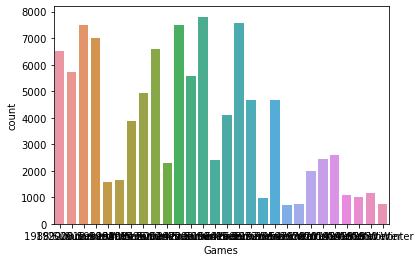

Year
2000    7809
1988    7648
2016    7573
2004    7509
2008    7499
1992    7296
2012    6997
1996    6599
1972    6534
1984    6006
1968    5675
1976    5410
1964    4830
1980    4620
2014    2612
2010    2448
2006    2417
2002    2295
1998    1986
1994    1651
Name: Year, dtype: int64
2000    7.407934
1988    7.255203
2016    7.184055
2004    7.123342
2008    7.113856
1992    6.921282
2012    6.637638
1996    6.260079
1972    6.198418
1984    5.697535
1968    5.383535
1976    5.132146
1964    4.581934
1980    4.382720
2014    2.477849
2010    2.322272
2006    2.292864
2002    2.177130
1998    1.884000
1994    1.566206
Name: Year, dtype: float64


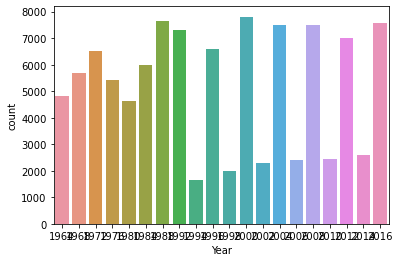

Season
Summer    84049
Winter    21365
Name: Season, dtype: int64
Summer    79.732294
Winter    20.267706
Name: Season, dtype: float64


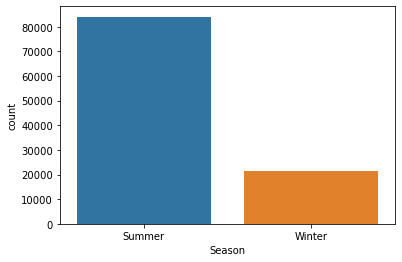

City
Sydney            7809
Rio de Janeiro    7573
Athina            7509
Beijing           7499
London            6997
Atlanta           6599
Seoul             6504
Barcelona         5733
Munich            5570
Los Angeles       4935
Mexico City       4674
Montreal          4666
Tokyo             4111
Moskva            3870
Sochi             2612
Vancouver         2448
Torino            2417
Salt Lake City    2295
Nagano            1986
Lillehammer       1651
Albertville       1563
Innsbruck         1463
Calgary           1144
Sarajevo          1071
Grenoble          1001
Sapporo            964
Lake Placid        750
Name: City, dtype: int64
Sydney            7.407934
Rio de Janeiro    7.184055
Athina            7.123342
Beijing           7.113856
London            6.637638
Atlanta           6.260079
Seoul             6.169958
Barcelona         5.438557
Munich            5.283928
Los Angeles       4.681541
Mexico City       4.433946
Montreal          4.426357
Tokyo             3.89986

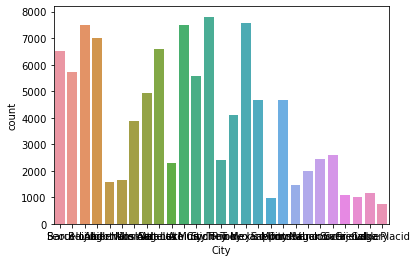

Sport
Athletics                    14560
Swimming                     10097
Gymnastics                    8810
Cross Country Skiing          4042
Rowing                        4001
Cycling                       3957
Shooting                      3803
Alpine Skiing                 3365
Fencing                       3063
Canoeing                      2897
Wrestling                     2617
Biathlon                      2577
Sailing                       2478
Ice Hockey                    2423
Speed Skating                 2323
Equestrianism                 2283
Football                      2252
Boxing                        2240
Hockey                        2222
Handball                      1920
Basketball                    1854
Judo                          1848
Volleyball                    1842
Weightlifting                 1529
Water Polo                    1396
Bobsleigh                     1181
Tennis                        1112
Archery                       1070
Ski Jumping   

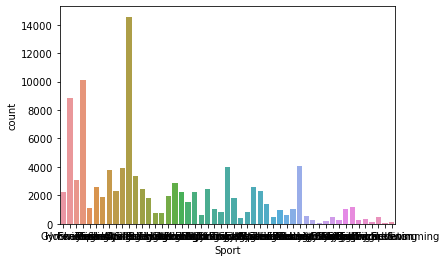

Event
Ice Hockey Men's Ice Hockey                       2004
Football Men's Football                           1685
Hockey Men's Hockey                               1451
Basketball Men's Basketball                       1174
Handball Men's Handball                           1173
                                                  ... 
Boxing Women's Flyweight                            12
Wrestling Women's Light-Heavyweight, Freestyle      11
Wrestling Women's Featherweight, Freestyle          11
Freestyle Skiing Women's Halfpipe                   11
Boxing Women's Middleweight                         10
Name: Event, Length: 486, dtype: int64
Ice Hockey Men's Ice Hockey                       1.901076
Football Men's Football                           1.598459
Hockey Men's Hockey                               1.376478
Basketball Men's Basketball                       1.113704
Handball Men's Handball                           1.112755
                                                    ...

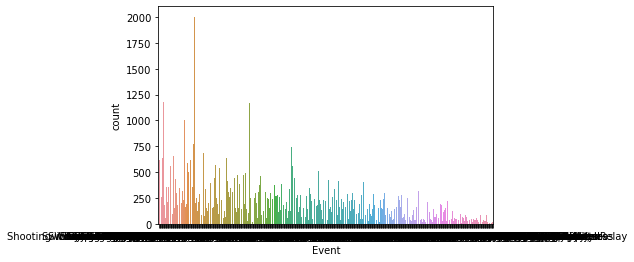

Medal
None      90465
Bronze     5112
Silver     4946
Gold       4891
Name: Medal, dtype: int64
None      85.818772
Bronze     4.849451
Silver     4.691976
Gold       4.639801
Name: Medal, dtype: float64


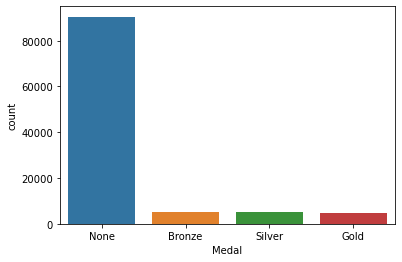

medalist
0    90465
1    14949
Name: medalist, dtype: int64
0    85.818772
1    14.181228
Name: medalist, dtype: float64


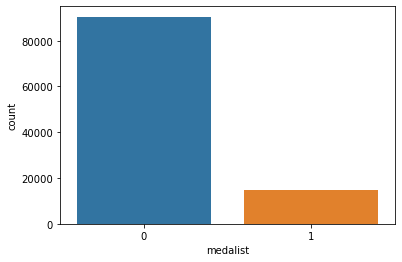

AgeBins
20s         73662
30s         16388
10s         13467
40s          1614
50s           247
60s            35
70s             1
Under_10        0
80s             0
Name: AgeBins, dtype: int64
20s         69.878764
30s         15.546322
10s         12.775343
40s          1.531106
50s          0.234314
60s          0.033202
70s          0.000949
Under_10     0.000000
80s          0.000000
Name: AgeBins, dtype: float64


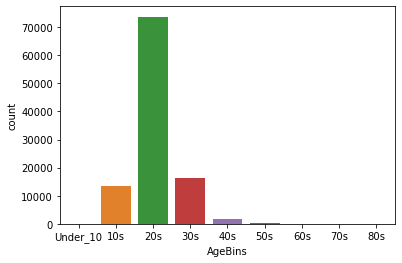

In [41]:
num_vars = ['Age', 'Height', 'Weight', 'BMI']
cat_vars = ['Sex', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'medalist', 'AgeBins']

for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

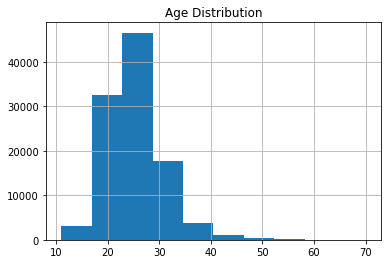

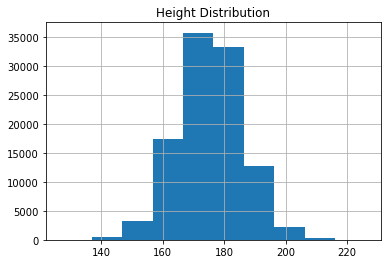

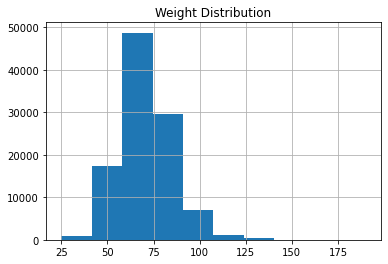

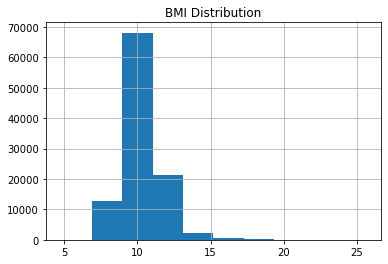

In [42]:
for col in num_vars:
    train[col].hist()
    plt.title(col+' Distribution')
    plt.show()

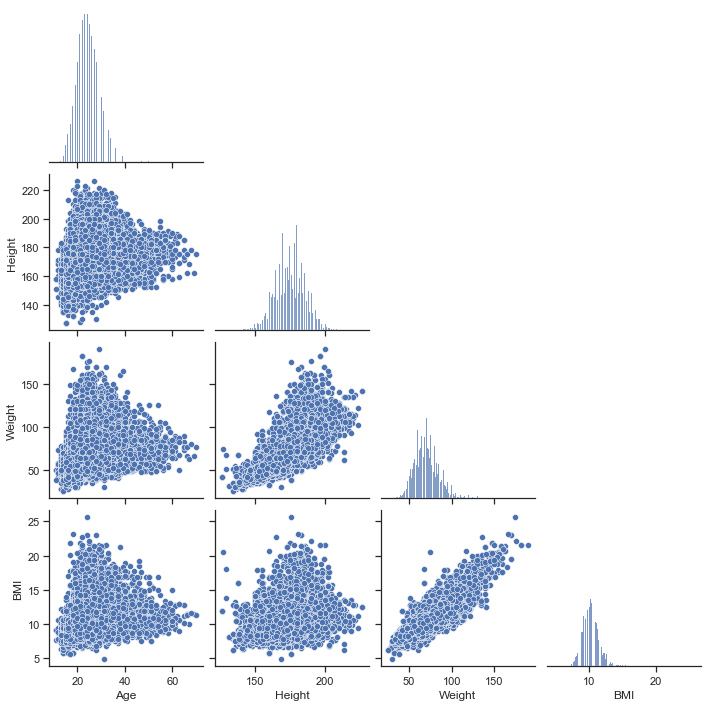

In [43]:
train_scatter = train[['Age', 'Height', 'Weight', 'BMI']]
sns.set_theme(style="ticks")
sns.pairplot(train_scatter, corner=True)

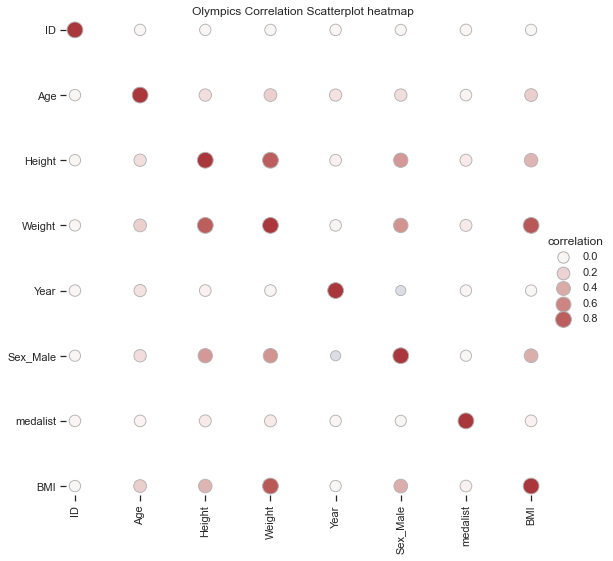

In [44]:
train_corr = train.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=train_corr,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=8, sizes=(100, 250), size_norm=(-.2, .8))
g.set(xlabel="", ylabel="", title='Olympics Correlation Scatterplot heatmap', aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

<AxesSubplot:xlabel='BMI', ylabel='Age'>

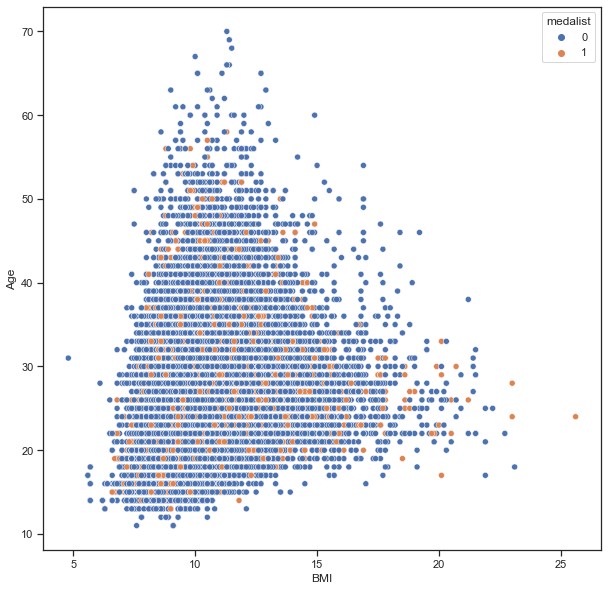

In [45]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='BMI', y='Age', data=train, hue='medalist')

<AxesSubplot:xlabel='BMI', ylabel='Age'>

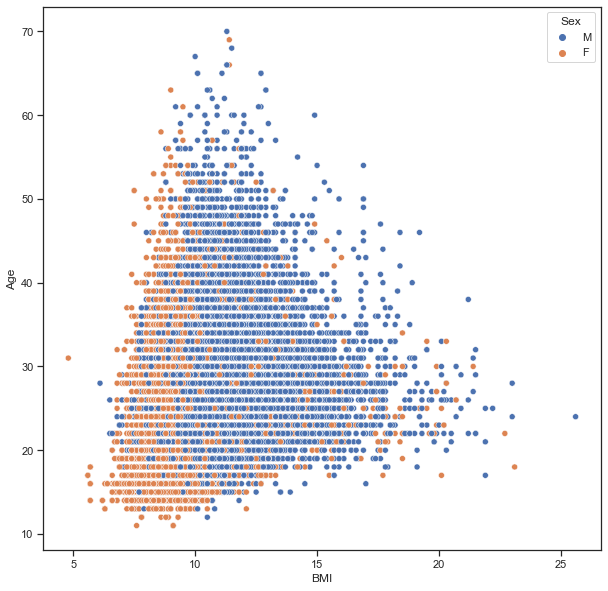

In [46]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='BMI', y='Age', data=train, hue='Sex')

<AxesSubplot:xlabel='BMI', ylabel='Age'>

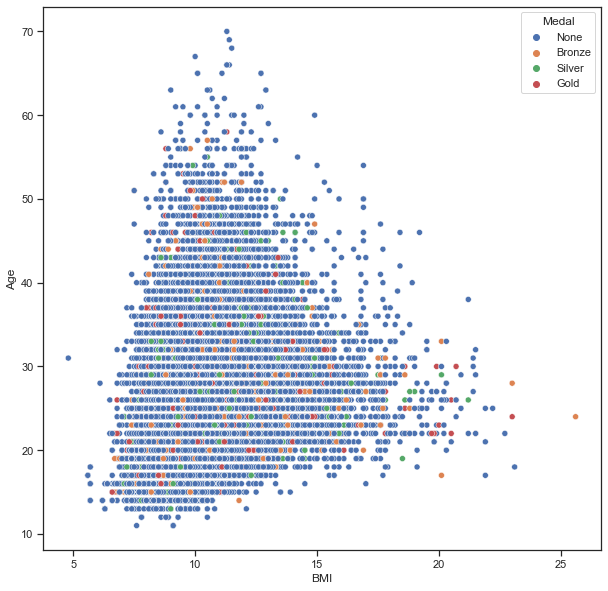

In [47]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='BMI', y='Age', data=train, hue='Medal')

In [48]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_Male,medalist,BMI,AgeBins
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,1,0,11.2,20s
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1,0,9.4,20s
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,1,0,NaN,20s
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,1,NaN,30s
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,10.9,20s


In [49]:
groups = df.groupby('Team').sum()

In [50]:
groups[groups['medalist'] == groups['medalist'].max()]


,ID,Age,Height,Weight,Year,Sex_Male,medalist,BMI
Team,,,,,,,,
United States,1187102587,456709.0,2527863.0,998567.333333,35174952,12479,5219,142634.1


In [51]:
groups = df.groupby('AgeBins').sum()

In [52]:
groups[groups['medalist'] == groups['medalist'].max()]


,ID,Age,Height,Weight,Year,Sex_Male,medalist,BMI
AgeBins,,,,,,,,
20s,12145078665,4300448.0,25877897.0,1.039639e+07,352182960,131852,27545,1499674.8


In [53]:
groups = df.groupby('Name').sum()

In [54]:
groups[groups['medalist'] == groups['medalist'].max()]


,ID,Age,Height,Weight,Year,Sex_Male,medalist,BMI
Name,,,,,,,,
"Michael Fred Phelps, II",2832180,726.0,5790.0,2730.0,60276,30,28,333.0


In [55]:
df1

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [56]:
df1.value_counts()

NOC  region                       notes                      
AHO  Curacao                      Netherlands Antilles           1
ANT  Antigua                      Antigua and Barbuda            1
YMD  Yemen                        South Yemen                    1
YAR  Yemen                        North Yemen                    1
WIF  Trinidad                     West Indies Federation         1
UAR  Syria                        United Arab Republic           1
TTO  Trinidad                     Trinidad and Tobago            1
SKN  Saint Kitts                  Turks and Caicos Islands       1
SCG  Serbia                       Serbia and Montenegro          1
NFL  Canada                       Newfoundland                   1
NBO  Malaysia                     North Borneo                   1
ISV  Virgin Islands, US           Virgin Islands                 1
IOA  Individual Olympic Athletes  Individual Olympic Athletes    1
HKG  China                        Hong Kong                      1


In [57]:
df1.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [58]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_Male,medalist,BMI,AgeBins
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,1,0,11.2,20s
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1,0,9.4,20s
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,1,0,NaN,20s
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,1,NaN,30s
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,10.9,20s


In [59]:
df.isnull().sum()

ID               0
Name             0
Sex              0
Age           9474
Height       60171
Weight       62875
Team             0
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal       231333
Sex_Male         0
medalist         0
BMI          64263
AgeBins       9476
dtype: int64

In [62]:
# X = df[['Sex_Male', 'Age', 'BMI']]
# y = df.medalist
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=.2, random_state=123, stratify=y)

X_cols = ['Sex_Male', 'Age', 'BMI']
X_train = train[X_cols]
y_train = train.medalist

X_validate = validate[X_cols]
y_validate = validate.medalist

X_test = test[X_cols]
y_test = test.medalist

In [63]:
tree = DecisionTreeClassifier()
params = {'max_depth': range(1,16),
          'max_features': [1, 2, 3, 4],
         'min_samples_leaf': range(1,16),
         'criterion': ['gini', 'entropy']}

grid = GridSearchCV(tree, params, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 16),
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': range(1, 16)})

In [64]:
results = grid.cv_results_
test_scores = results['mean_test_score']
params = results['params']

for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score', ascending=False)

,criterion,max_depth,max_features,min_samples_leaf,score
1278,entropy,7,2,4,0.858216
240,gini,5,1,1,0.858197
1263,entropy,7,1,4,0.858197
0,gini,1,1,1,0.858188
984,entropy,2,2,10,0.858188
...,...,...,...,...,...
1795,entropy,15,4,11,NaN
1796,entropy,15,4,12,NaN
1797,entropy,15,4,13,NaN
1798,entropy,15,4,14,NaN
